# Introduction
**This will be your workspace for Kaggle's Machine Learning education track.**

You will build and continually improve a model to predict housing prices as you work through each tutorial.  Fork this notebook and write your code in it.

The data from the tutorial, the Melbourne data, is not available in this workspace.  You will need to translate the concepts to work with the data in this notebook, the Iowa data.

Come to the [Learn Discussion](https://www.kaggle.com/learn-forum) forum for any questions or comments. 

# Write Your Code Below



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

main_file_path = 'data/house_prices_train.csv'
data = pd.read_csv(main_file_path)
data.head()
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
data[['SalePrice', 'LotArea']].head()

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260


In [4]:
y = data['SalePrice']

Predictors for the machine learning model:

In [5]:
predictors = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = data[predictors]

In [6]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
X.head(10)
tree_model.predict(X.head(10))
data['SalePrice'].head(10)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
5,14115,1993,796,566,1,1,5
6,10084,2004,1694,0,2,3,7
7,10382,1973,1107,983,2,3,7
8,6120,1931,1022,752,2,2,8
9,7420,1939,1077,0,1,2,5


array([208500., 181500., 223500., 140000., 250000., 143000., 307000.,
       200000., 129900., 118000.])

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

In [8]:
from sklearn.metrics import mean_absolute_error
predictions = tree_model.predict(X)
mean_absolute_error(predictions, y)
# In-sample score, not good

62.35433789954339

Split into train and validation datasets to prevent the above:

In [9]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
tree_model.fit(train_X, train_y)

predictions = tree_model.predict(val_X)
mean_absolute_error(predictions, val_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

32524.4

In [10]:
# Use to see how well the Decision Tree model works with differet parameters for max leaf nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    tree_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    tree_model.fit(train_X, train_y)
    predictions = tree_model.predict(val_X)
    return mean_absolute_error(predictions, val_y)

In [11]:
for max_nodes in [10, 25, 50, 75, 100]:
    mae = get_mae(max_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t \t Mean absolute error: %d" %(max_nodes, mae))

Max leaf nodes: 10  	 	 Mean absolute error: 30616
Max leaf nodes: 25  	 	 Mean absolute error: 28501
Max leaf nodes: 50  	 	 Mean absolute error: 27825
Max leaf nodes: 75  	 	 Mean absolute error: 27455
Max leaf nodes: 100  	 	 Mean absolute error: 28653


Random Forest model, more advanced than Decision Tree:

In [12]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_features=4, random_state=0)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mean_absolute_error(predictions, val_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

22555.539726027397

Submitting:

In [13]:
train = pd.read_csv('data/house_prices_train.csv')
train_y = train['SalePrice']
predictors = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']
train_X = train[predictors]

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)

test = pd.read_csv('data/house_prices_test.csv')
predictions = forest_model.predict(test[predictors])
predictions

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

array([127400., 206450., 151590., ..., 165270., 160690., 254750.])

In [14]:
# submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions })
# submission.to_csv('submission.csv', index=False)

## Level 2:

In [15]:
print(data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [16]:
def print_mae(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=0)
    forest_model.fit(train_X, train_y)
    predictions = forest_model.predict(val_X)
    print(mean_absolute_error(predictions, val_y))

Taking care of null/missing values:

In [17]:
complete_data = data.dropna(axis=1)
# Alternative (so that you can drop the columns in both train and test datasets): 
complete_columns = [col for col in data.columns 
                                if not data[col].isnull().any()]
complete_data = data[complete_columns]

reduced_y = complete_data['SalePrice']
reduced_X = complete_data.drop('SalePrice', axis=1).select_dtypes(exclude=['object'])
reduced_train_X, reduced_val_X, reduced_train_y, reduced_val_y = train_test_split(reduced_X, reduced_y, random_state=0)

print("Dropping all columns with missing values: ")
print_mae(reduced_train_X, reduced_val_X, reduced_train_y, reduced_val_y)

Dropping all columns with missing values: 
19895.280821917808


In [18]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

imputed_data = pd.DataFrame(imputer.fit_transform(data.select_dtypes(exclude='object')))
imputed_data.index = data.index
imputed_data.columns = data.select_dtypes(exclude='object').columns

imputed_y = imputed_data['SalePrice']
imputed_X = imputed_data.drop('SalePrice', axis=1)
imputed_train_X, imputed_val_X, imputed_train_y, imputed_val_y = train_test_split(imputed_X, imputed_y)

print("Using Imputer to impute missing values based on the mean of each column: ")
print_mae(imputed_train_X, imputed_val_X, imputed_train_y, imputed_val_y)

Using Imputer to impute missing values based on the mean of each column: 
17954.496986301372


Imputing values and also adding columns to mark which values were imputed:

In [19]:
imputed_data_plus = imputed_data.copy()
missing_columns = [col for col in data.columns
                                if data[col].isnull().any()]
for col in missing_columns:
    imputed_data_plus[col + '_was_missing'] = data[col].isnull()

imputed_y_plus = imputed_data_plus['SalePrice']
imputed_X_plus = imputed_data_plus.drop('SalePrice', axis=1)

imputed_train_X_plus, imputed_val_X_plus, imputed_train_y_plus, imputed_val_y_plus = train_test_split(imputed_X_plus, imputed_y_plus)
print("Imputed values with columns keeping track of which were imputed: ")
print_mae(imputed_train_X_plus, imputed_val_X_plus, imputed_train_y_plus, imputed_val_y_plus)

Imputed values with columns keeping track of which were imputed: 
20712.16630136986


Most of the time, dropping columns is not a good way to deal with missing values. Also, keeping track of imputed values can help sometimes but not always (in the example above its MAE ranged from 17k-22k, whereas without keeping track, it ranged from maybe 18k-21k). 

One-Hot Encoding to turn categorical columns into numerical values that can be used to build the model:  

In [20]:
# Add back object columns with low cardinality to data with imputed values\n",
# Cardinality means the number of unique values in a column\n",
object_columns = [col for col in data.columns
                                if (data[col].dtype == 'object') and data[col].nunique() < 10]
imputed_data = imputed_data.join(data[object_columns])
imputed_y = imputed_data['SalePrice']
imputed_X = imputed_data.drop('SalePrice', axis=1)
imputed_X.dtypes.sample(10)

Functional       object
Foundation       object
Condition1       object
KitchenAbvGr    float64
PavedDrive       object
GarageQual       object
YearRemodAdd    float64
PoolQC           object
Heating          object
ExterQual        object
dtype: object

In [21]:
# get_dummies does the one hot encoding for you\n",
one_hot_encoded_X = pd.get_dummies(imputed_X)

from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(random_state=0), one_hot_encoded_X, imputed_y, scoring='neg_mean_absolute_error').mean() * -1

19188.52900924729

In [22]:
# If you had train and test DataFrames, you'd need to align their columns or else it screws up the models:
test = pd.read_csv('data/house_prices_test.csv')
test_temp = pd.DataFrame(imputer.fit_transform(test.select_dtypes(exclude='object')))
test_temp.index = test.index
test_temp.columns = test.select_dtypes(exclude='object').columns
object_columns = [col for col in test.columns
                                if (test[col].dtype == 'object') and test[col].nunique() < 10]
test_temp = test_temp.join(test[object_columns])
test = pd.get_dummies(test_temp)

# Something like:
# train, test = train.align(test, join='inner', axis=1)

XGBoost:

In [23]:
# Rename the current data we're using to data:
complete_data = data
data = pd.get_dummies(imputed_data)

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X, test = X.align(test, join='left', axis=1)

test['Id'] = test['Id'].astype('int32')
data['Id'] = data['Id'].astype('int32')

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25)

In [24]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(train_X, train_y)
predictions = xgb_model.predict(val_X)
print("Error for XGBoost:")
print(mean_absolute_error(predictions, val_y))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Error for XGBoost:
16930.49734589041


In [25]:
# n_estimators is how many times to go through XGBoost's modeling cycle
# learning_rate: multiply predictions feach model by small constant, each tree helps less, prevents overfitting
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1)
# Stop modeling cycle after 5 consecutive increases in validation error
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=False)
# High n_estimators, low early_stopping_rounds might generally be the best performance, although takes longer to run
predictions = xgb_model.predict(val_X)
print(mean_absolute_error(predictions, val_y))
# For large datasets, set n_jobs = # of cores computer has, parallelism to make fitting faster

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

17586.402622003425


In [26]:
predictions = xgb_model.predict(test)
predictions

array([122654.04, 157992.38, 167136.67, ..., 152508.47, 122795.77,
       245677.77], dtype=float32)

In [27]:
# submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions })
# submission.to_csv('submission.csv', index=False)

Partial Dependence Plots:

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

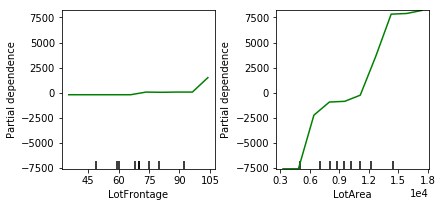

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
model = GradientBoostingRegressor() # Only works on gradient boosting models
model.fit(X, y)
my_plot = plot_partial_dependence(model, features=[2, 3], X=X, feature_names=X.columns, grid_resolution=10)

Shows that as lot area increases, house price increases also. 

Pipelines:

In [29]:
from sklearn.pipeline import make_pipeline

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25)
pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [30]:
pipeline.fit(train_X, train_y)
predictions = pipeline.predict(val_X)
mean_absolute_error(predictions, val_y)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_s...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

21093.56904109589

Cross Validation:   

Better accuracy than train_test_split, although takes longer. For small datasets, use it, but for large datasets, it might take too long when train_test_split would be able to do just fine. 

In [31]:
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor()
cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

array([-19052.16262834, -18734.90533881, -19784.20802469])

In [32]:
cross_val_score(model, X, y, scoring='neg_mean_absolute_error').mean() * -1

19641.379091636318

Avoid data leakage by performing preprocessing after split or with a pipeline:

In [33]:
X = complete_data.drop('SalePrice', axis=1)
y = complete_data['SalePrice']
columns = [col for col in X.columns
                      if X[col].dtype != 'object' or X[col].nunique() < 10]
X = X[columns]
X = pd.get_dummies(X)

test = pd.read_csv('data/house_prices_test.csv')
columns = [col for col in test.columns
                      if test[col].dtype != 'object' or test[col].nunique() < 10]
test = test[columns]
test = pd.get_dummies(test)

X, test = X.align(test, join='outer', axis=1)

In [34]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(Imputer(), XGBRegressor())
cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error').mean() * -1

16445.914405270483

In [35]:
pipeline.fit(X, y)
predictions = pipeline.predict(test)

submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

Final public submission score for Kaggle's [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) challenge: 0.13679 (1885 out of 4512)